In [1]:
# Fake News Detection - Starter Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load datasets
true_df = pd.read_csv('data/True.csv')
fake_df = pd.read_csv('data/Fake.csv')

In [3]:
# Add labels
true_df['label'] = 1  # Real news
fake_df['label'] = 0  # Fake news

In [4]:
# Combine datasets
df = pd.concat([true_df, fake_df]).reset_index(drop=True)

In [5]:
# Shuffle data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

label
0    23481
1    21417
Name: count, dtype: int64


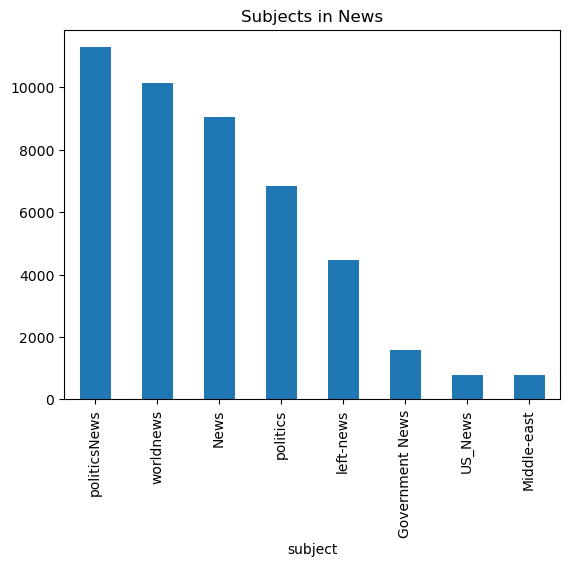

In [6]:
# Simple EDA
print(df['label'].value_counts())
df['subject'].value_counts().plot(kind='bar')
plt.title("Subjects in News")
plt.show()

In [7]:
# Preprocessing
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [8]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']


In [9]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4669
           1       0.98      0.98      0.98      4311

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



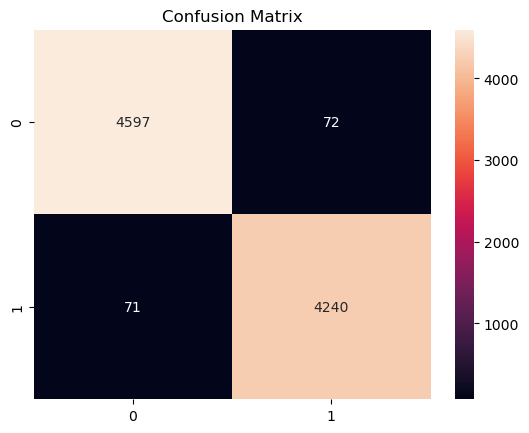

In [10]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()